# <h1 style = "text-align: center">[DS4A] Nexans - Exploratory Data Analysis</h1>

# <h2 style = "text-align: left">Nexans Colombia | Team # 22</h2>

# <h4 style = "text-align: left">Andres Fabian Osorio, Aron Forero, Camilo Castellanos, Guillermo Castillo, Jairo Bautista, Jorge Florez, Nicolás López </h4>

# <h2 style = "text-align: left">Case Introduction</h2>


<p> 

**Business Context.**  Nexans Colombia is an electrical wiring and telecommunications world-class manufacturer. Nexans Colombia has been growing significantly over the last 13 years. They have contacted DS4A students to help them understand the variation in demand of electrical wiring on the market so that they can foresee the supply chain better. Nexans is interested in learning how external factors such as the metal stock market, currency and building GDP affect their sales.
</p>
<br>

<p> 

**Business Problem.** The company would like DS4A data scientists to answer the following questions: **“What’s the product families’ demand variation on a fixed period (monthly, quarterly, yearly) for the market segments?”**, **“Is there any client clusterization based on customer behaviour different than the current customer segments on the company?”** and **“Are there any external factors that can influentiate the electrical wiring demand?**
</p>
<br>

<p> 

**Analytical Context.** Thus the scenario above can be common amongst manufacturing businesses, aligning offer and demand might be a very complex problem to solve, as it would represent a business crystal ball. As a first approach, DS4A data scientists begin a preliminary Exploratory Data Analysis (EDA) on Nexans Colombia historical sales by opening the CSV file on Jupyter Notebook, followed by initial column descriptions and name cleaning. Later on, we proceed by checking null values and a relevant variables analysis. Finally we graph sales per year to give a full picture of the current dataset.

</p>
<br>


# <h2>Market Trend Forecast </h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

<h2>What are the datasets that participants will consider to use to solve this problem?</h2>

<p><strong>Dataset that participants can access to solve the problem.</strong> 
Historical sales of the company and a forecast already built in the company.</p>

<p>The features we will use in this case are:</p>
<ol>
<li><strong>Documento de ventas:</strong> Billing number; Integer</li>
<li><strong>Destinatario mcía.:</strong> Customer ID (NIT); Integer</li>
<li><strong>Fecha Reparto:</strong> Fecha de despacho de producto; Integer</li>
<li><strong>Posición docto ventas:</strong> Position on bill; Integer</li>
<li><strong>Material:</strong> Product ID; Integer </li>
<li><strong>Texto breve de material:</strong> Product description; Text</li>
<li><strong>Cantidad entrega:</strong> Quantity Billed; Integer</li>
<li><strong>Un.medida venta:</strong> Unit of measurement (M); String</li>
<li><strong>Peso bruto:</strong> Total weight; Float</li>
<li><strong>MC Al Kg:</strong> Amount of Aluminium on product; Float</li>
<li><strong>MC Cu Kg:</strong> Amount of Copper on product; Float </li>
<li><strong>Fecha de pedido:</strong> Created by; Integer</li>


<li><strong>Fecha Entrega:</strong> Delivery date; Integer</li>
<li><strong>Stock a Pedidos:</strong> Product definition; String</li>
<li><strong>GRUPO MATERIALES 2:</strong> Material Group; String</li>
<li><strong>Grupo Clientes:</strong> customer family; String</li>
<li><strong>Valor Moneda Local:</strong> Billing; Integer </li>
<li><strong>Moneda:</strong> Currency; Text</li>
<li><strong>METROS:</strong> Length quantity in Meters; Integer</li>
<li><strong>PRODUCT ABC:</strong> ABC product classification (A: High priority, B: Mid priority, C: low priority, Z: lowest priority, OUT: no priority ; String</li>
<li><strong>Customer ABC:</strong>ABC product classification (A: High priority, B: Mid priority, C: low priority, Z: lowest priority, OUT: no priority ; String</li>
<li><strong>MARKET LINE:</strong> Customer market classification; String</li>
<li><strong>Antes de color:</strong> Product description before coating; String </li>
<li><strong>Antes de fracionado:</strong> Product description After coating, before fractioning; String</li>
</ol>

In [ ]:
# load csv dataset
df = pd.read_csv("drive/My Drive/DS4A/data/ventas.csv", delimiter = ';', parse_dates=['Fecha Reparto', 'Fecha Entrega'])
rename_columns = {
    'Destinatario mcía.': 'Destinatario mcia',
    'Posición docto ventas': 'Posicion docto ventas',
    'Un.medida venta': 'Un. medida venta',
    'Stock a  Pedidos': 'Stock a Pedidos',
    'GRUPO MATERIALES 2': 'Grupo Materiales 2',
    'Grupo  Clientes': 'Grupo Clientes',
    'METROS': 'Metros',
    'PRODUCT ABC': 'Product ABC',
    'CUSTOMER ABC': 'Customer ABC',
    'MARKET LINE': 'Market Line'
}
df.rename(columns=rename_columns, inplace=True)

In [ ]:
df.head(3)

,Documento de ventas,Destinatario mcia,Fecha Reparto,Posicion docto ventas,Material,Texto breve de material,Cantidad entrega,Un. medida venta,Peso bruto,MC Al Kg,MC Cu Kg,Fecha de Pedido,Fecha Entrega,Stock a Pedidos,Grupo Materiales 2,Grupo Clientes,Valor Moneda Local,Moneda,Metros,Product ABC,Customer ABC,Market Line,Antes de color,Antes de fraccionado
0,460773.0,27676447956,2019-04-01,60,10011309,C.1/0AWG (B) Cu DESNUDO SEMIDURO,25.0,M,"12,11",0,"12,11",2/01/2019,2019-02-01,A PEDIDO,Nexans CO C Desnudo Cu,Distrib. y retail,100.166.000,COP,25.0,OUT,Z,D&I,C Desnudo Cu 1/0,C Desnudo Cu 1/0 DES
1,460780.0,4361707432,2019-04-01,10,10011766,C.12AWG THHN/THWN-2 TC 600V 90ºC AM R100,1.5,M,"53,476",0,"43,53",2/01/2019,2019-02-01,STOCK,Nexans CO C 14 - 10 AWG THHN/T,Distrib. y retail,469.587.000,COP,1.5,A,B,D&I,C 14 - 10 AWG THHN/THWN Cu 12,C 14 - 10 AWG THHN/THWN Cu 12 AM
2,460780.0,4361707432,2019-04-01,20,10011764,C.12AWG THHN/THWN-2 TC 600V 90ºC AZ R100,1.5,M,"53,476",0,"43,53",2/01/2019,2019-02-01,STOCK,Nexans CO C 14 - 10 AWG THHN/T,Distrib. y retail,469.587.000,COP,1.5,A,B,D&I,C 14 - 10 AWG THHN/THWN Cu 12,C 14 - 10 AWG THHN/THWN Cu 12 AZ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125225 entries, 0 to 125224
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Documento de ventas      125211 non-null  float64       
 1   Destinatario mcia        125225 non-null  object        
 2   Fecha Reparto            125225 non-null  datetime64[ns]
 3   Posicion docto ventas    125225 non-null  int64         
 4   Material                 125225 non-null  int64         
 5   Texto breve de material  125225 non-null  object        
 6   Cantidad entrega         125225 non-null  float64       
 7   Un. medida venta         125225 non-null  object        
 8   Peso bruto               125225 non-null  object        
 9   MC Al Kg                 125225 non-null  object        
 10  MC Cu Kg                 125225 non-null  object        
 11  Fecha de Pedido          112519 non-null  object        
 12  Fecha Entrega   

In [ ]:
df.describe()

,Documento de ventas,Posicion docto ventas,Material,Cantidad entrega,Metros
count,1.252110e+05,125225.000000,1.252250e+05,125225.000000,125225.000000
mean,6.162153e+08,115.437397,1.071354e+07,196.362499,208.736300
std,1.585746e+09,189.676501,6.704112e+06,241.299687,246.747249
min,4.454690e+05,1.000000,1.001104e+07,1.000000,1.000000
25%,4.720120e+05,20.000000,1.001176e+07,2.000000,2.000000
50%,4.830190e+05,50.000000,1.003363e+07,17.000000,15.000000
75%,4.961965e+05,130.000000,1.004033e+07,500.000000,500.000000
max,4.700069e+09,2250.000000,8.000632e+07,999.000000,999.000000


In [ ]:
df.describe(include=['O'])

,Destinatario mcia,Texto breve de material,Un. medida venta,Peso bruto,MC Al Kg,MC Cu Kg,Fecha de Pedido,Stock a Pedidos,Grupo Materiales 2,Grupo Clientes,Valor Moneda Local,Moneda,Product ABC,Customer ABC,Market Line,Antes de color,Antes de fraccionado
count,125225,125225,125225,125225,125225,125225,112519,125225,125225,108806,125225,108806,113826,121632,106845,116965,116965
unique,251,1524,6,15660,3052,9459,478,2,33,4,27258,1,7,9,7,348,497
top,#VALUE!,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,M,"106,521",0,0,0/01/1900,STOCK,Nexans CO Alambre de Cobre THH,Distrib. y retail,0,COP,A,A,D&I,Alambre de Cobre THHN/THWN 12,Acometida Antifraude 8 NE
freq,16405,7369,113745,3760,107633,17691,3713,102468,28900,80948,23621,108806,55583,74053,87408,15272,8138


In [ ]:
#convert 'Valor Moneda Local' from string to int
df['Valor Moneda Local'] = df['Valor Moneda Local'].str.replace('.', '')
df['Valor Moneda Local'] = df['Valor Moneda Local'].astype(int)

## Null Values Analysis

In [ ]:
print('Null Percentage of each variable: \n')
null_percentage = (df.isnull().sum()/df.shape[0])*100
null_percentage[null_percentage != 0]

Null Percentage of each variable: 



Documento de ventas      0.011180
Fecha de Pedido         10.146536
Fecha Entrega            0.064684
Grupo Clientes          13.111599
Moneda                  13.111599
Product ABC              9.102815
Customer ABC             2.869235
Market Line             14.677580
Antes de color           6.596127
Antes de fraccionado     6.596127
dtype: float64

## First Relevant Variables Analysis

In [ ]:
df["Grupo Clientes"].value_counts()

Distrib. y retail       80948
Industrie               14347
Empresas contratista    11691
Industrias               1820
Name: Grupo Clientes, dtype: int64

In [ ]:
#Replace bad dates in 'Fecha de Pedido' column
df["Fecha de Pedido"] = df["Fecha de Pedido"].str.replace('0/01/1900', '01/01/1900', regex=False)
# convertion datetime columns
df['Fecha de Pedido'] = pd.to_datetime(df['Fecha de Pedido'])

In [ ]:
# There are so many numbers that are repeated, but is possible to have several items in just one invoice
df["Documento de ventas"].value_counts()

4.960960e+05    487
4.821180e+05    446
4.958000e+05    401
4.957990e+05    400
4.687620e+05    350
               ... 
4.700068e+09      1
4.883640e+05      1
4.668810e+05      1
4.883700e+05      1
4.886270e+05      1
Name: Documento de ventas, Length: 14059, dtype: int64

In [ ]:
df['Market Line'].value_counts()

D&I          87408
UTILITIES    14129
INDUSTRY      2743
EXPORT        1659
PROJECTS       775
Interco        126
LAN              5
Name: Market Line, dtype: int64

In [ ]:
# amount of products
df['Texto breve de material'].unique().size

1524

### Null values in 'Grupo Clientes'

There is something interesting, the column 'Grupo Clientes' has got some NaN values, but this is a required field for a sale.

In [ ]:
df_gcnull = df[df["Grupo Clientes"].isnull()]
df_gcnull.head(3)

,Documento de ventas,Destinatario mcia,Fecha Reparto,Posicion docto ventas,Material,Texto breve de material,Cantidad entrega,Un. medida venta,Peso bruto,MC Al Kg,MC Cu Kg,Fecha de Pedido,Fecha Entrega,Stock a Pedidos,Grupo Materiales 2,Grupo Clientes,Valor Moneda Local,Moneda,Metros,Product ABC,Customer ABC,Market Line,Antes de color,Antes de fraccionado
4381,4.700063e+09,#VALUE!,2019-02-01,10,10024686,A.14AWG THHN/THWN-2 600V 90ºCAM C 500,10.00,M,"226,802",0,"182,3",NaT,2019-02-01,STOCK,Nexans CO Alambre de Cobre THH,NaN,0,NaN,10.00,B,NaN,NaN,Alambre de Cobre THHN/THWN 14,Alambre de Cobre THHN/THWN 14 AM
4382,4.700063e+09,#VALUE!,2019-02-01,20,10044589,750Kcmil AL AA8000 THHW TC 600V 90C - NE,1.01,M,"1.408,95","1.036,16",0,NaT,2019-02-01,A PEDIDO,Nexans CO Cable S8000,NaN,0,NaN,1.01,A,NaN,NaN,Cable S8000 750,Cable S8000 750 NE
4383,4.700063e+09,#VALUE!,2019-02-01,20,10044589,750Kcmil AL AA8000 THHW TC 600V 90C - NE,707.00,M,"986,265","725,31",0,NaT,2019-02-01,A PEDIDO,Nexans CO Cable S8000,NaN,0,NaN,707.00,A,NaN,NaN,Cable S8000 750,Cable S8000 750 NE


In [ ]:
df_gcnull.describe()

,Documento de ventas,Posicion docto ventas,Material,Cantidad entrega,Valor Moneda Local,Metros
count,1.640500e+04,16419.000000,1.641900e+04,16419.000000,16419.0,16419.000000
mean,4.700068e+09,25.946404,1.031627e+07,240.096929,0.0,240.096929
std,1.016639e+03,29.486492,2.201049e+06,263.245776,0.0,263.245776
min,4.700063e+09,1.000000,1.001104e+07,1.000000,0.0,1.000000
25%,4.700067e+09,10.000000,1.002867e+07,2.500000,0.0,2.500000
50%,4.700068e+09,10.000000,1.004083e+07,32.000000,0.0,32.000000
75%,4.700069e+09,30.000000,1.004688e+07,500.000000,0.0,500.000000
max,4.700069e+09,330.000000,8.000606e+07,999.000000,0.0,999.000000


In [ ]:
df_gcnull.describe(include=['O'])

,Destinatario mcia,Texto breve de material,Un. medida venta,Peso bruto,MC Al Kg,MC Cu Kg,Stock a Pedidos,Grupo Materiales 2,Grupo Clientes,Moneda,Product ABC,Customer ABC,Market Line,Antes de color,Antes de fraccionado
count,16419,16419,16419,16419,16419,16419,16419,16419,0,0,11136,13526,0,12509,12509
unique,2,813,3,4471,994,2913,2,29,0,0,7,3,0,213,314
top,#VALUE!,1X8+8AWG ACOMCONC XLPE600V90C XLPE USE-M,M,"106,521",0,0,STOCK,Nexans CO Acometida Antifraude,NaN,NaN,A,Z,NaN,Acometida Antifraude 8,Acometida Antifraude 8 NE
freq,16405,2336,16145,1891,10612,5929,9375,2591,NaN,NaN,6228,13515,NaN,2374,2374


In the rows where 'Grupo Clientes' is missing, the column 'Valor Moneda Local' is also missing, it seems like this rows correspond to cancel orders or something like that, we have to ask the company if this is true.

In [ ]:
df_gcnull["Destinatario mcia"].value_counts()

#VALUE!        16405
2,51251E+11       14
Name: Destinatario mcia, dtype: int64

'Destinatario mcia' has also strange values, so this column is useless too.

## Sales per Year Analysis

In [ ]:
# total sales
df['Valor Moneda Local'].sum()

108550537303086

In [ ]:
# adding time columns
df.insert(0, 'YEAR', pd.DatetimeIndex(df['Fecha Reparto']).year)
df.insert(1, 'MONTH', pd.DatetimeIndex(df['Fecha Reparto']).month)
df.insert(2, 'DAY', pd.DatetimeIndex(df['Fecha Reparto']).day)
df.insert(3, 'WEEK', df['Fecha Reparto'].dt.weekday)

In [ ]:
# Grouping by sales per year
year_df = df.groupby(['YEAR', 'MONTH']).agg({'Valor Moneda Local': 'sum'})
year_df['Valor Moneda Local'] = year_df['Valor Moneda Local']
year_df.reset_index(inplace = True)
year_df

,YEAR,MONTH,Valor Moneda Local
0,2019,1,4602001695784
1,2019,2,6118221443124
2,2019,3,5273238807496
3,2019,4,4604619299636
4,2019,5,5861722279900
5,2019,6,5922887128354
6,2019,7,5854168895604
7,2019,8,6571942317656
8,2019,9,6361220425978
9,2019,10,6492600374698


### 'Valor Moneda local' through time (Months)

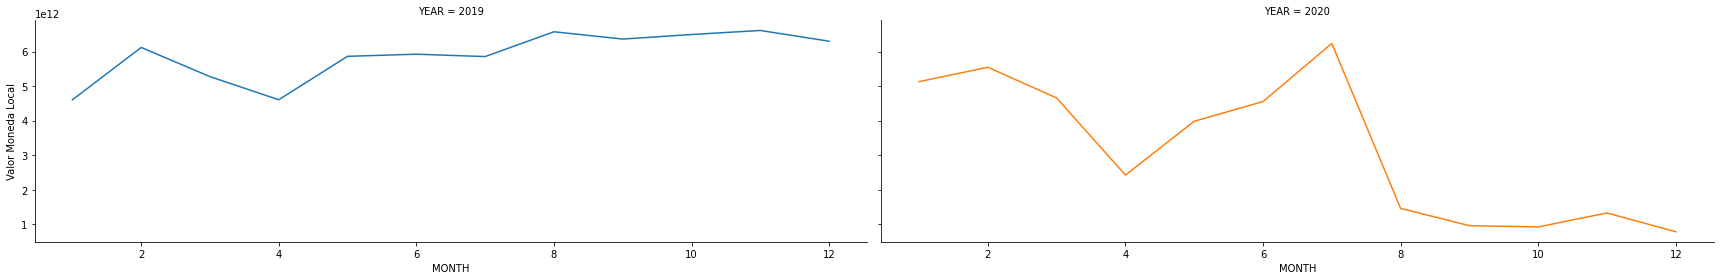

In [ ]:
ax = sns.FacetGrid(year_df , col = 'YEAR', hue = 'YEAR', height=4, aspect=3)
ax.map(sns.lineplot, 'MONTH', 'Valor Moneda Local')
plt.tight_layout()

### Takeaways

On this Jupyter Notebook we have deep-dived on the data provided by Nexans Colombia, and described the columns of interest and plotted the aggregated sales through time. We still need to understand from the company why there are NaN values on this database and whether we should take them into consideration on our analysis or not. 